<a href="https://colab.research.google.com/github/armandovl/funciones_descriptiva/blob/main/Clase_Estadistica_Descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importamos librerías de cajon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#importamos el data frame
url="https://raw.githubusercontent.com/armandovl/datasets_uno/main/atitanic.csv"
datos= pd.read_csv(url) #leer la url y ponerlo en un dataframe
datos.head() #ver el encabezado

,PassengerId,Name,Age,Pclass,Sex,Family,Embarked,Survived
0,891,"Dooley, Mr. Patrick",32.0,3,male,0,Q,muere
1,890,"Behr, Mr. Karl Howell",26.0,1,male,0,C,vive
2,888,"Graham, Miss. Margaret Edith",19.0,1,female,0,S,vive
3,887,"Montvila, Rev. Juozas",27.0,2,male,0,S,muere
4,886,"Rice, Mrs. William (Margaret Norton)",39.0,3,female,5,Q,muere


## Manejo del Data Frame

In [8]:
datos.head(8) #primeras 8 filas

,PassengerId,Name,Age,Pclass,Sex,Family,Embarked,Survived
0,891,"Dooley, Mr. Patrick",32.0,3,male,0,Q,muere
1,890,"Behr, Mr. Karl Howell",26.0,1,male,0,C,vive
2,888,"Graham, Miss. Margaret Edith",19.0,1,female,0,S,vive
3,887,"Montvila, Rev. Juozas",27.0,2,male,0,S,muere
4,886,"Rice, Mrs. William (Margaret Norton)",39.0,3,female,5,Q,muere
5,885,"Sutehall, Mr. Henry Jr",25.0,3,male,0,S,muere
6,884,"Banfield, Mr. Frederick James",28.0,2,male,0,S,muere
7,883,"Dahlberg, Miss. Gerda Ulrika",22.0,3,female,0,S,muere


In [ ]:
datos.tail(5) #últimas 8 filas

In [ ]:
datos.shape #imprime las filas y las columnas

In [ ]:
datos.columns #nombre de las columnas

In [ ]:
datos.dtypes #tipos de variables

In [ ]:
datos.info() # nombre columna conteo nulos tipos de variables

In [11]:
#cambiar nombre de ciertas columnas
datos=datos.rename(columns={'PassengerId':'Identificador',
                      'Name':'El nombre',
                      'Age':'la edad'}
             )
datos

,Identificador,El nombre,la edad,Pclass,Sex,Family,Embarked,Survived
0,891,"Dooley, Mr. Patrick",32.0,3,male,0,Q,muere
1,890,"Behr, Mr. Karl Howell",26.0,1,male,0,C,vive
2,888,"Graham, Miss. Margaret Edith",19.0,1,female,0,S,vive
3,887,"Montvila, Rev. Juozas",27.0,2,male,0,S,muere
4,886,"Rice, Mrs. William (Margaret Norton)",39.0,3,female,5,Q,muere
...,...,...,...,...,...,...,...,...
709,5,"Allen, Mr. William Henry",35.0,3,male,0,S,muere
710,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,female,1,S,vive
711,3,"Heikkinen, Miss. Laina",26.0,3,female,0,S,vive
712,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,female,1,C,vive


In [108]:
#cambiar nombre de todas columnas
datos.columns = ['Id', 'Nombre', 'Edad', 'Clase', 'Sexo', 'Familia','Embarcacion','Sobrevivientes']
datos

,Id,Nombre,Edad,Clase,Sexo,Familia,Embarcacion,Sobrevivientes
0,891,"Dooley, Mr. Patrick",32.0,3,male,0,Q,muere
1,890,"Behr, Mr. Karl Howell",26.0,1,male,0,C,vive
2,888,"Graham, Miss. Margaret Edith",19.0,1,female,0,S,vive
3,887,"Montvila, Rev. Juozas",27.0,2,male,0,S,muere
4,886,"Rice, Mrs. William (Margaret Norton)",39.0,3,female,5,Q,muere
...,...,...,...,...,...,...,...,...
709,5,"Allen, Mr. William Henry",35.0,3,male,0,S,muere
710,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,female,1,S,vive
711,3,"Heikkinen, Miss. Laina",26.0,3,female,0,S,vive
712,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,female,1,C,vive


In [109]:
#eliminar columna
datos=datos.drop(['Id'],axis=1)
datos

,Nombre,Edad,Clase,Sexo,Familia,Embarcacion,Sobrevivientes
0,"Dooley, Mr. Patrick",32.0,3,male,0,Q,muere
1,"Behr, Mr. Karl Howell",26.0,1,male,0,C,vive
2,"Graham, Miss. Margaret Edith",19.0,1,female,0,S,vive
3,"Montvila, Rev. Juozas",27.0,2,male,0,S,muere
4,"Rice, Mrs. William (Margaret Norton)",39.0,3,female,5,Q,muere
...,...,...,...,...,...,...,...
709,"Allen, Mr. William Henry",35.0,3,male,0,S,muere
710,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,female,1,S,vive
711,"Heikkinen, Miss. Laina",26.0,3,female,0,S,vive
712,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,female,1,C,vive


In [110]:
#eliminar varias columnas
datos=datos.drop(['Nombre',"Familia",'Embarcacion'],axis=1)
datos

,Edad,Clase,Sexo,Sobrevivientes
0,32.0,3,male,muere
1,26.0,1,male,vive
2,19.0,1,female,vive
3,27.0,2,male,muere
4,39.0,3,female,muere
...,...,...,...,...
709,35.0,3,male,muere
710,35.0,1,female,vive
711,26.0,3,female,vive
712,38.0,1,female,vive


In [111]:
datos.describe() #descriptivos

,Edad,Clase
count,714.000000,714.000000
mean,29.699118,2.236695
std,14.526497,0.838250
min,0.420000,1.000000
25%,20.125000,1.000000
50%,28.000000,2.000000
75%,38.000000,3.000000
max,80.000000,3.000000


In [112]:
datos.describe().round(1) #descriptivos un decimal

,Edad,Clase
count,714.0,714.0
mean,29.7,2.2
std,14.5,0.8
min,0.4,1.0
25%,20.1,1.0
50%,28.0,2.0
75%,38.0,3.0
max,80.0,3.0


In [113]:
datos.describe().round(1).transpose() #descriptivos un decimal y transpuesto

,count,mean,std,min,25%,50%,75%,max
Edad,714.0,29.7,14.5,0.4,20.1,28.0,38.0,80.0
Clase,714.0,2.2,0.8,1.0,1.0,2.0,3.0,3.0


In [114]:
datos.Clase=pd.Categorical(datos["Clase"]) #Transformamos en cateorica

In [115]:
datos.info() #vemos que la variable ya es categorica 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Edad            714 non-null    float64 
 1   Clase           714 non-null    category
 2   Sexo            714 non-null    object  
 3   Sobrevivientes  714 non-null    object  
dtypes: category(1), float64(1), object(2)
memory usage: 17.7+ KB


In [116]:
datos.describe().round(1).transpose() #como Clase ya es categórica ya no aparecen sus descriptivos

,count,mean,std,min,25%,50%,75%,max
Edad,714.0,29.7,14.5,0.4,20.1,28.0,38.0,80.0


## Estadísticos descriptivos de una variable

In [165]:
# Medidas de tendencia central
total=len(datos["Edad"]) #largo de la variable
media = datos["Edad"].mean() #media
mediana = datos["Edad"].median() #mediana
moda = datos["Edad"].mode()[0] #moda no se olvide poner el [0]
varianza= datos["Edad"].var(ddof=1) #varianza ddof=0 poblacional ddof=1 muestral
desv_st=datos["Edad"].std(ddof=1) #desviación estandar ddof=0 poblacional ddof=1 muestral
coef_var=(datos["Edad"].std(ddof=1)/ datos["Edad"].mean())*100 #agregar el *100

#creamos un Data Frame llamado descriptivos_a
descriptivos_a=pd.DataFrame()
descriptivos_a["medida"]=["total_datos","media","mediana","moda","varianza","desviacion_estandar","coficiente_variación"]
descriptivos_a["valores"]=[total,media,mediana,moda,varianza,desv_st,coef_var]

descriptivos_a.round(1)


,medida,valores
0,total_datos,714.0
1,media,29.7
2,mediana,28.0
3,moda,24.0
4,varianza,211.0
5,desviacion_estandar,14.5
6,coficiente_variación,48.9


In [159]:
moda = datos["Edad"].mode() #moda

In [160]:
moda

0    24.0
dtype: float64

## Estadísticos descriptivos por grupo

In [27]:
#estadísticos por grupo
agrupados_datos = datos.groupby('Sexo')
agrupados_datos.describe().round(1).transpose()

Sexo        female   male
Edad count   261.0  453.0
     mean     27.9   30.7
     std      14.1   14.7
     min       0.8    0.4
     25%      18.0   21.0
     50%      27.0   29.0
     75%      37.0   39.0
     max      63.0   80.0

In [28]:
agrupados_datos = datos[['Edad']]
agrupados_datos = datos.groupby('Sexo')
agrupados_datos.describe().round(1).transpose()

Sexo        female   male
Edad count   261.0  453.0
     mean     27.9   30.7
     std      14.1   14.7
     min       0.8    0.4
     25%      18.0   21.0
     50%      27.0   29.0
     75%      37.0   39.0
     max      63.0   80.0

In [29]:
#define la función para calcular cv 
cv = lambda x: np. std (x, ddof = 1 ) / np. mean (x) * 100 

In [30]:
 #calcular CV
 cv (datos)

Edad    48.912219
dtype: float64

## Gráficos bloxplot

AxesSubplot(0.125,0.125;0.775x0.755)


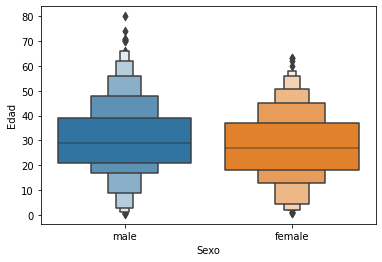

In [31]:
ax=sns.boxenplot(x="Sexo", y="Edad", data=datos)
print(ax)

AxesSubplot(0.125,0.125;0.775x0.755)


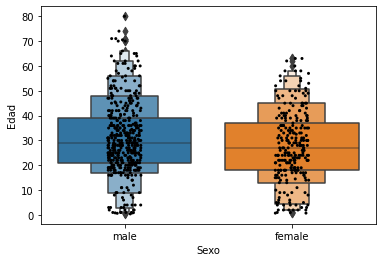

In [32]:
ax=sns.boxenplot(x="Sexo", y="Edad", data=datos)
ax =sns.stripplot(x="Sexo", y="Edad", data=datos, size=3, jitter=True, color="black")
print(ax)

AxesSubplot(0.125,0.125;0.775x0.755)


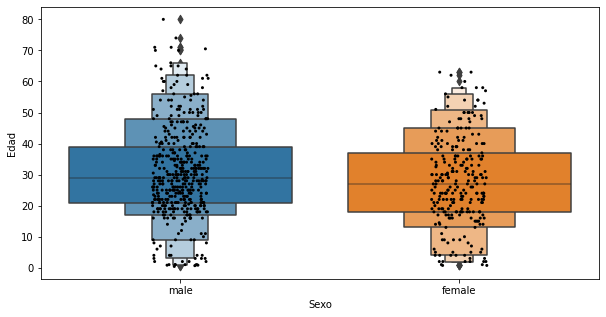

In [33]:
plt.figure(figsize=(10,5)) #tamaño figura x, y
ax=sns.boxenplot(x="Sexo", y="Edad", data=datos)
ax =sns.stripplot(x="Sexo", y="Edad", data=datos, size=3, jitter=True, color="black")
print(ax)

AxesSubplot(0.125,0.125;0.775x0.755)


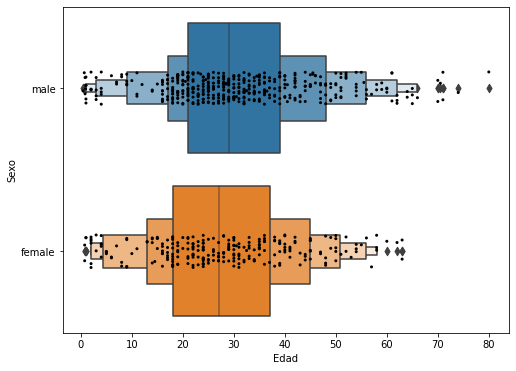

In [34]:
plt.figure(figsize=(8,6)) #tamaño figura x, y
ax=sns.boxenplot(x="Edad", y="Sexo", data=datos)
ax =sns.stripplot(x="Edad", y="Sexo", data=datos, size=3, jitter=True, color="black")
print(ax)

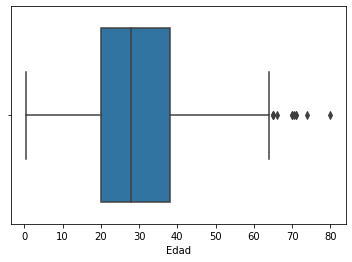

In [35]:
ax = sns.boxplot(x="Edad", data=datos)

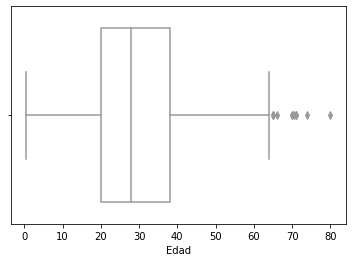

In [36]:
ax = sns.boxplot(x="Edad", data=datos,color="White")

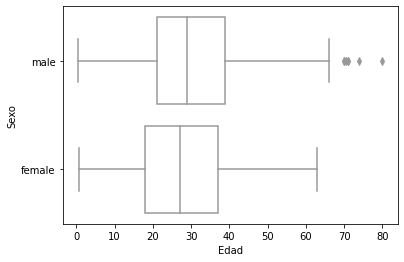

In [37]:
ax = sns.boxplot(x="Edad" , y="Sexo", data=datos,color="White")

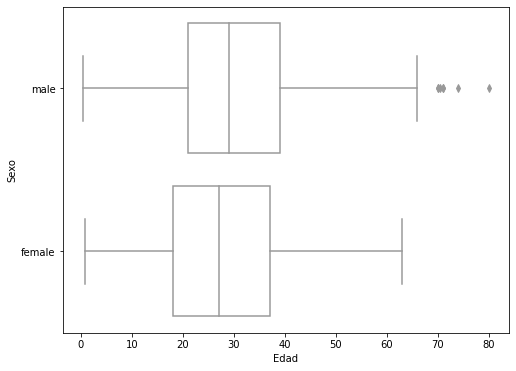

In [38]:
plt.figure(figsize=(8,6)) #tamaño figura x, y
ax = sns.boxplot(x="Edad" , y="Sexo", data=datos,color="White")

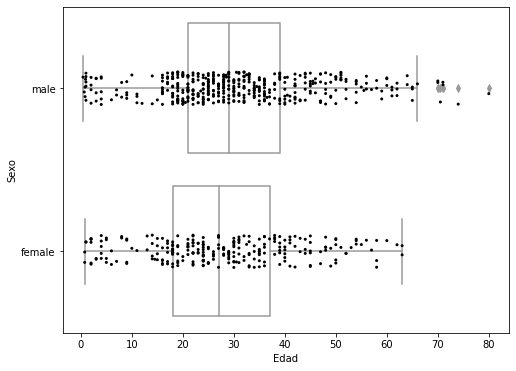

In [39]:
plt.figure(figsize=(8,6)) #tamaño figura x, y
ax = sns.boxplot(x="Edad" , y="Sexo", data=datos,color="White")
ax =sns.stripplot(x="Edad", y="Sexo", data=datos, size=3, jitter=True, color="black")

AxesSubplot(0.125,0.125;0.775x0.755)


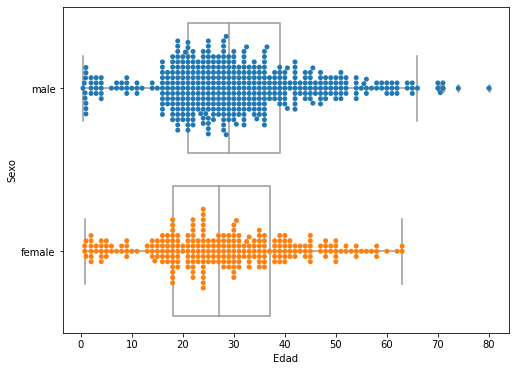

In [40]:
plt.figure(figsize=(8,6)) #tamaño figura x, y
ax = sns.boxplot(x="Edad" , y="Sexo", data=datos,color="White")
ax =sns.swarmplot(x="Edad", y="Sexo", data=datos)
print(ax)

AxesSubplot(0.125,0.125;0.775x0.755)


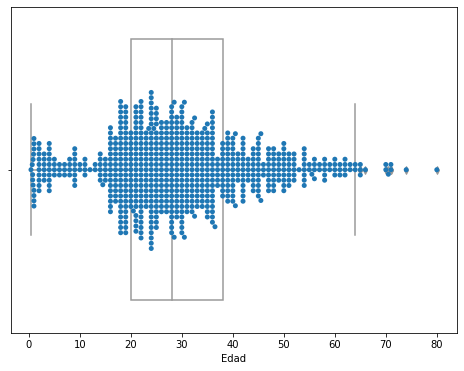

In [41]:
plt.figure(figsize=(8,6)) #tamaño figura x, y
ax = sns.boxplot(x="Edad"  ,data=datos,color="White")
ax =sns.swarmplot(x="Edad", data=datos)
print(ax)

AxesSubplot(0.125,0.125;0.775x0.755)


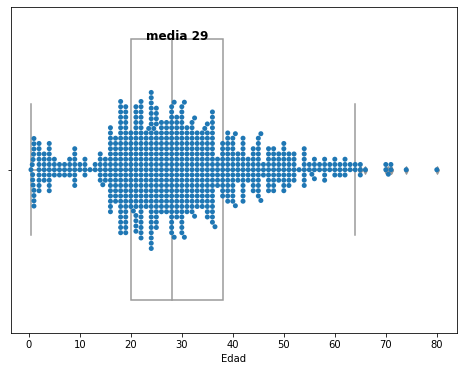

In [42]:
plt.figure(figsize=(8,6)) #tamaño figura x, y
ax = sns.boxplot(x="Edad"  ,data=datos,color="White")
ax =sns.swarmplot(x="Edad", data=datos)
ax.text(29,-0.4, "media 29", weight="bold",size=12,ha='center')#color="green"
print(ax)

AxesSubplot(0.125,0.125;0.775x0.755)


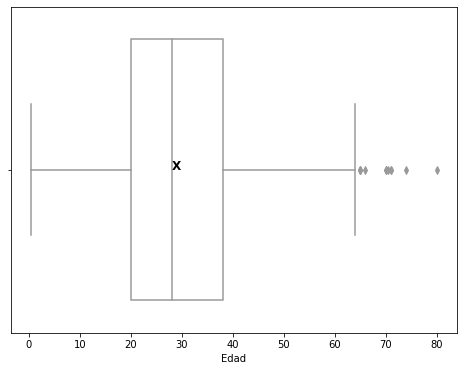

In [43]:
plt.figure(figsize=(8,6)) #tamaño figura x, y
ax = sns.boxplot(x="Edad"  ,data=datos,color="White")
#ax =sns.swarmplot(x="Edad", data=datos)
ax.text(29,0, "X", weight="bold",size=12,ha='center')#color="green"
print(ax)

AxesSubplot(0.125,0.125;0.775x0.755)


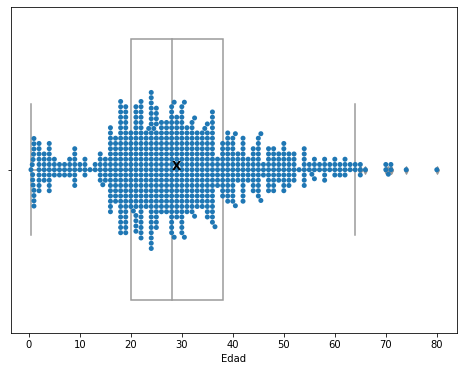

In [44]:
plt.figure(figsize=(8,6)) #tamaño figura x, y
ax = sns.boxplot(x="Edad"  ,data=datos,color="White")
ax =sns.swarmplot(x="Edad", data=datos)
ax.text(29,0, "X", weight="bold",size=12,ha='center')#color="green"
print(ax)

AxesSubplot(0.125,0.125;0.775x0.755)


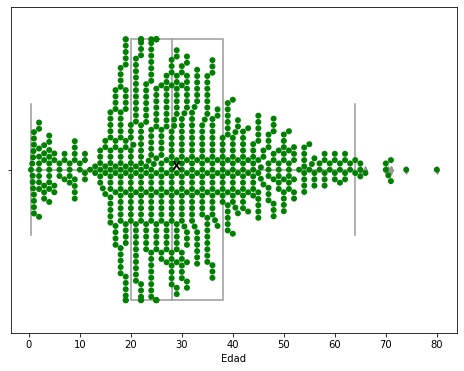

In [45]:
plt.figure(figsize=(8,6)) #tamaño figura x, y
ax = sns.boxplot(x="Edad"  ,data=datos,color="White")
ax =sns.swarmplot(x="Edad", data=datos,color="green", size=6)
ax.text(29,0, "X", weight="bold",size=12,ha='center')#color="green"
print(ax)

AxesSubplot(0.125,0.125;0.775x0.755)


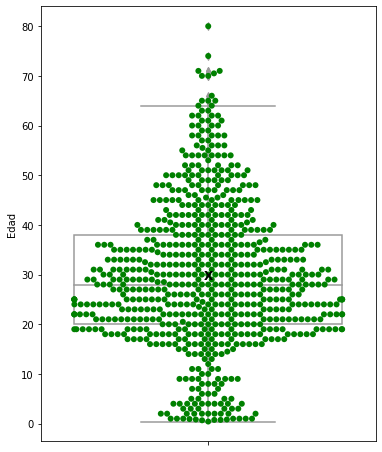

In [46]:
plt.figure(figsize=(6,8)) #tamaño figura x, y
ax = sns.boxplot(y="Edad"  ,data=datos,color="White")
ax =sns.swarmplot(y="Edad", data=datos,color="green", size=6)
ax.text(0,29, "X", weight="bold",size=12,ha='center')#color="green"
print(ax)

## Histogramas

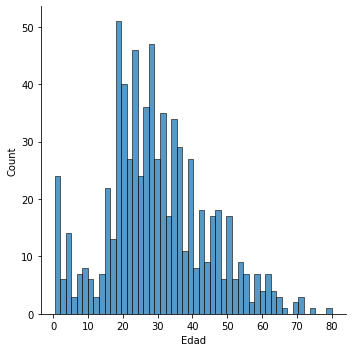

In [47]:
sns.displot(datos["Edad"],bins=50)

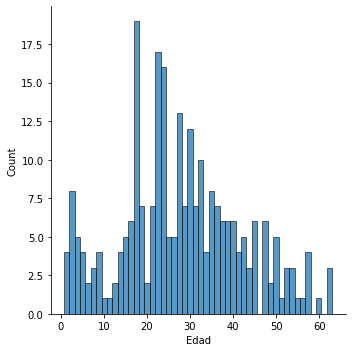

In [48]:
sns.displot(datos["Edad"][datos.Sexo=="female"], bins=50)

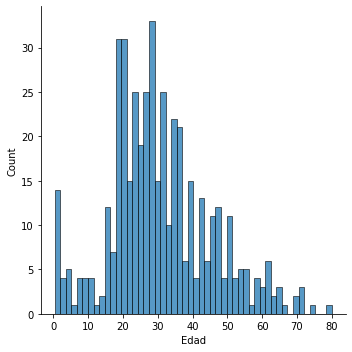

In [49]:
sns.displot(datos["Edad"][datos.Sexo=="male"], bins=50)

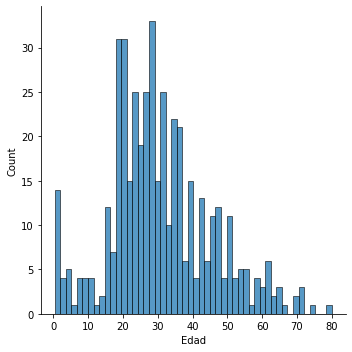

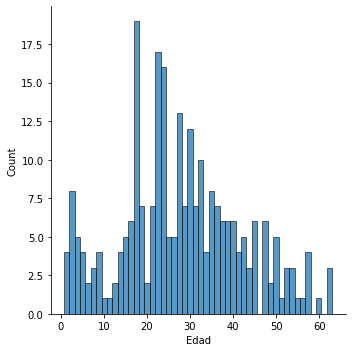

In [50]:
ax=sns.displot(datos["Edad"][datos.Sexo=="male"], bins=50)
ax=sns.displot(datos["Edad"][datos.Sexo=="female"], bins=50)

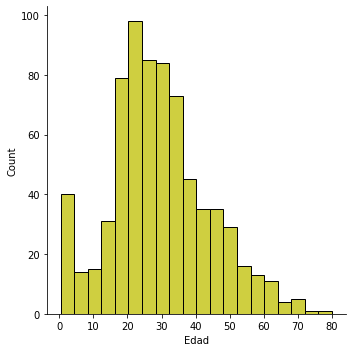

In [51]:
ax=sns.displot(datos["Edad"],color="y")

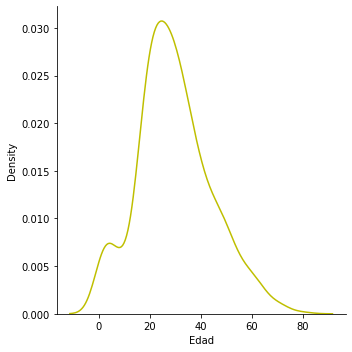

In [52]:
ax=sns.displot(datos["Edad"],color="y",kind="kde")

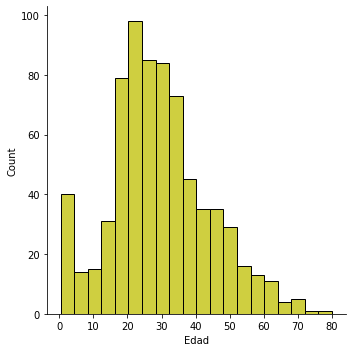

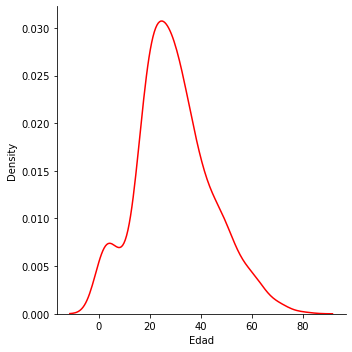

In [53]:
ax=sns.displot(datos["Edad"],color="y")
ax=sns.displot(datos["Edad"],color="r",kind="kde")
print(ax)

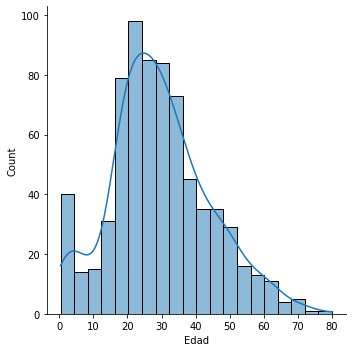

In [54]:
sns.displot(datos["Edad"], kde=True)

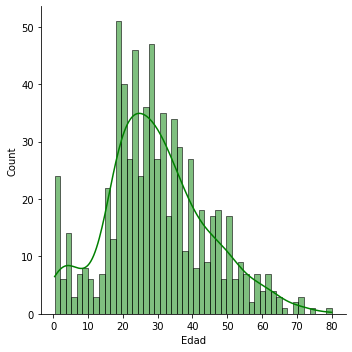

In [55]:
sns.displot(datos["Edad"], kde=True, bins=50,color="green")

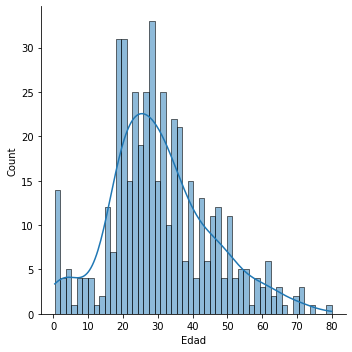

In [56]:
ax=sns.displot(datos["Edad"][datos.Sexo=="male"], bins=50,kde=True)

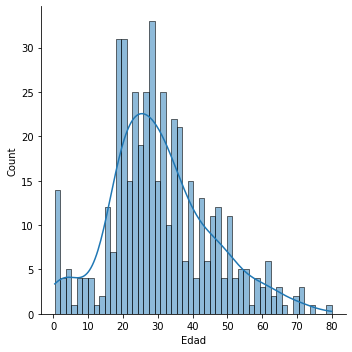

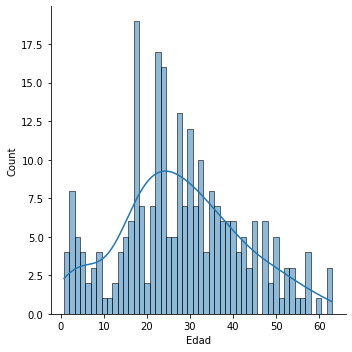

In [57]:
ax=sns.displot(datos["Edad"][datos.Sexo=="male"], bins=50,kde=True)
ax=sns.displot(datos["Edad"][datos.Sexo=="female"], bins=50,kde=True)

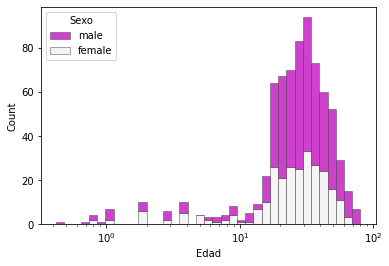

In [58]:
sns.histplot(
    datos,
    x="Edad", hue="Sexo",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

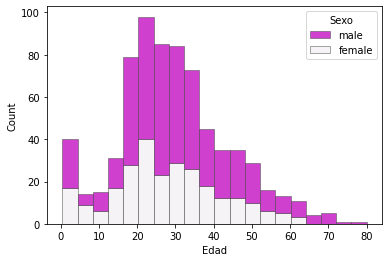

In [59]:
sns.histplot(
    datos,
    x="Edad", hue="Sexo",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)

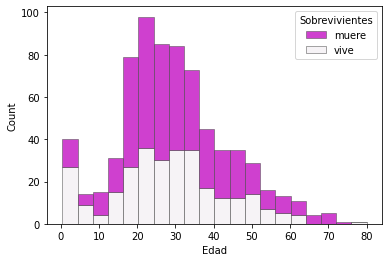

In [60]:
sns.histplot(
    datos,
    x="Edad", hue="Sobrevivientes",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)

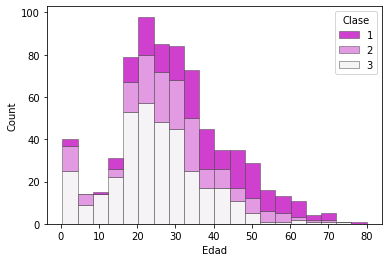

In [61]:
sns.histplot(
    datos,
    x="Edad", hue="Clase",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)

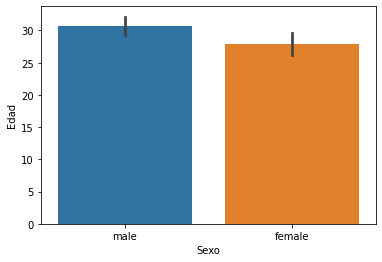

In [62]:
sns.barplot(x="Sexo",y="Edad",data=datos)

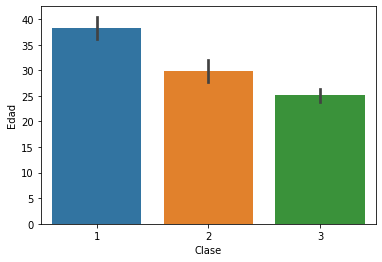

In [63]:
sns.barplot(x="Clase",y="Edad",data=datos)

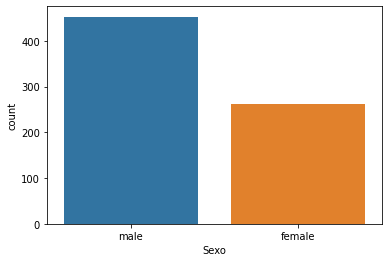

In [64]:
sns.countplot(x="Sexo",data=datos)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


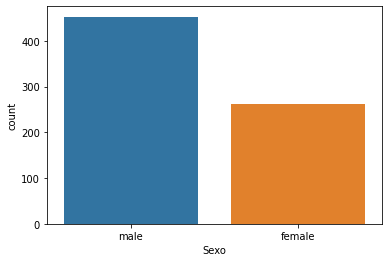

In [65]:
sns.countplot(datos["Sexo"])

## Gráfico de violin

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


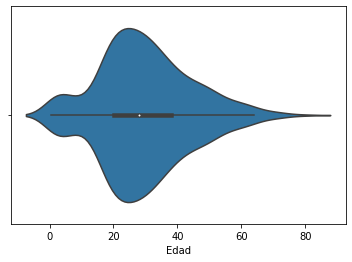

In [66]:
sns.violinplot(datos["Edad"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


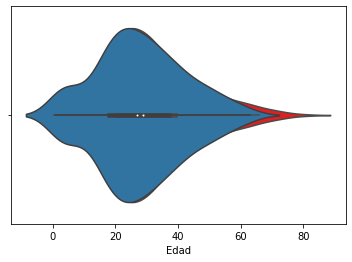

In [67]:
sns.violinplot(datos["Edad"][datos.Sexo=="male"],color="red")
sns.violinplot(datos["Edad"][datos.Sexo=="female"])

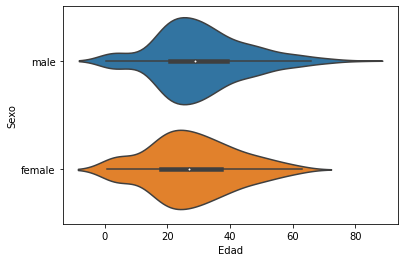

In [68]:
sns.violinplot(x="Edad", y="Sexo", data=datos)

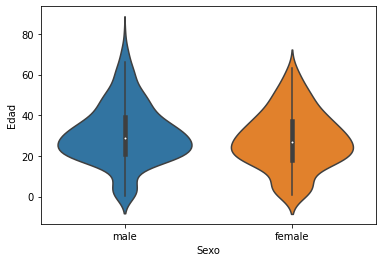

In [69]:
sns.violinplot(x="Sexo", y="Edad", data=datos)

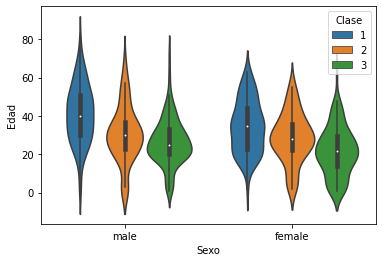

In [70]:
sns.violinplot(x="Sexo", y="Edad",hue="Clase", data=datos)

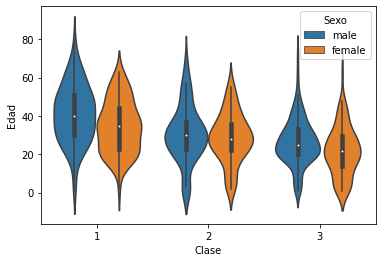

In [71]:
sns.violinplot(x="Clase", y="Edad",hue="Sexo", data=datos)

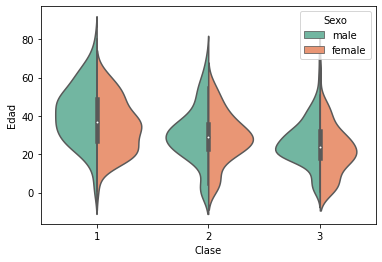

In [72]:
ax = sns.violinplot(x="Clase", y="Edad", hue="Sexo",
                    data=datos, palette="Set2", split=True,
                   )

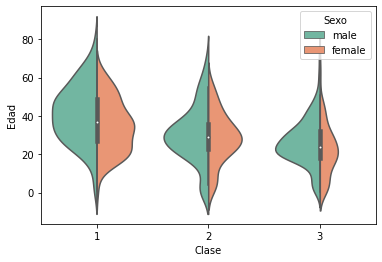

In [73]:
ax = sns.violinplot(x="Clase", y="Edad", hue="Sexo",
                    data=datos, palette="Set2", split=True,
                    scale="count")

## Otro graficos

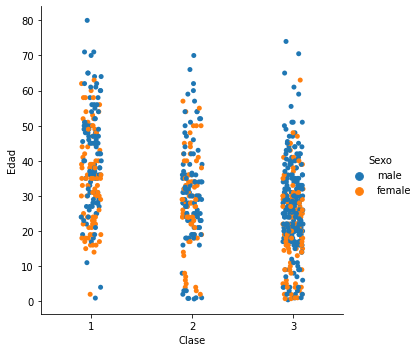

In [74]:
sns.catplot(x="Clase", y="Edad", hue="Sexo",
                    data=datos)

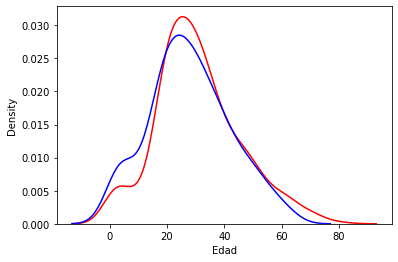

In [75]:
sns.kdeplot(datos["Edad"][datos.Sexo=="male"],color="red")
sns.kdeplot(datos["Edad"][datos.Sexo=="female"],color="blue")

In [76]:
datos["Sexo"].value_counts()

male      453
female    261
Name: Sexo, dtype: int64

In [77]:
datos["Clase"].value_counts()

3    355
1    186
2    173
Name: Clase, dtype: int64

## estadísticas por grupo

In [78]:
datos.groupby("Clase")["Edad"].mean()
#direfentes medias
#https://docs.python.org/es/3.8/library/statistics.html

Clase
1    38.233441
2    29.877630
3    25.140620
Name: Edad, dtype: float64

In [79]:
datos.groupby("Clase")["Edad"].median()

Clase
1    37.0
2    29.0
3    24.0
Name: Edad, dtype: float64

## Estadísticos XXXX

714

In [ ]:
from scipy import stats #error estandar de la media
stats.sem(datos["Edad"], ddof = 1) 

In [ ]:
from scipy import stats #error estandar de la media
stats.sem(datos["Edad"], ddof = 0) 

In [ ]:
import numpy as np
import scipy.stats as st

#define sample data
data = [12, 12, 13, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 28, 29]

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.90, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 

In [ ]:
#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 

In [ ]:
st.t.interval(alpha=0.99, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 

In [ ]:
st.t.interval(alpha=0.90, df=len(datos["Edad"])-1, loc=np.mean(datos["Edad"]), scale=st.sem(datos["Edad"]))

In [ ]:
st.t.interval(alpha=0.95, df=len(datos["Edad"])-1, loc=np.mean(datos["Edad"]), scale=st.sem(datos["Edad"])) 

In [ ]:
st.t.interval(alpha=0.99, df=len(datos["Edad"])-1, loc=np.mean(datos["Edad"]), scale=st.sem(datos["Edad"])) 

In [ ]:
datos.Edad.groupby(datos["Sexo"]).count().plot(kind='pie')

In [ ]:
datos.Edad.groupby(datos["Sexo"]).count().plot(kind='pie',autopct='%1.1f%%')

In [ ]:
datos.Edad.groupby(datos["Sexo"]).count().plot(kind='pie',autopct='%1.0f%%')

## Gráficos Agrupados

In [86]:
#importamos el data frame
url="https://raw.githubusercontent.com/armandovl/datasets_uno/main/atitanic.csv"
datos= pd.read_csv(url)
datos.head()

,PassengerId,Name,Age,Pclass,Sex,Family,Embarked,Survived
0,891,"Dooley, Mr. Patrick",32.0,3,male,0,Q,muere
1,890,"Behr, Mr. Karl Howell",26.0,1,male,0,C,vive
2,888,"Graham, Miss. Margaret Edith",19.0,1,female,0,S,vive
3,887,"Montvila, Rev. Juozas",27.0,2,male,0,S,muere
4,886,"Rice, Mrs. William (Margaret Norton)",39.0,3,female,5,Q,muere


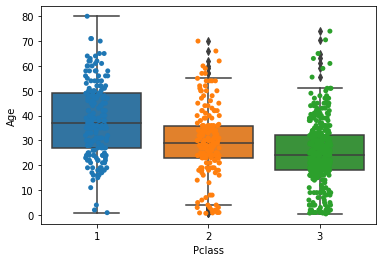

In [87]:
ax = sns.boxplot(x="Pclass", y="Age", data=datos)
ax = sns.stripplot(x="Pclass", y="Age", data=datos, jitter=True, edgecolor="gray")

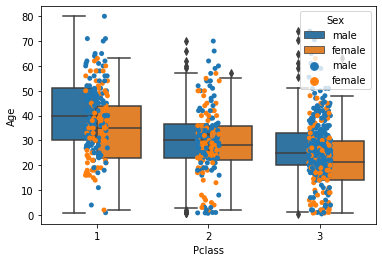

In [88]:
ax = sns.boxplot(x="Pclass", y="Age", data=datos ,hue="Sex")
ax = sns.stripplot(x="Pclass", y="Age", data=datos, jitter=True, edgecolor="gray" ,hue="Sex")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


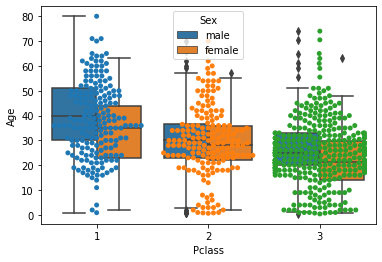

In [89]:
ax = sns.boxplot(x="Pclass", y="Age", data=datos ,hue="Sex")
ax = sns.swarmplot(x="Pclass", y="Age", data=datos, edgecolor="gray")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


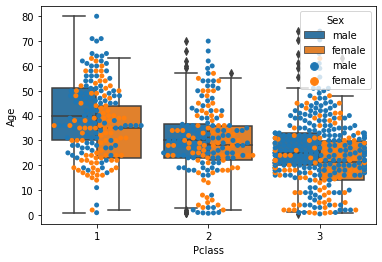

In [90]:
ax = sns.boxplot(x="Pclass", y="Age", data=datos ,hue="Sex")
ax = sns.swarmplot(x="Pclass", y="Age", data=datos, edgecolor="gray",hue="Sex" )

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


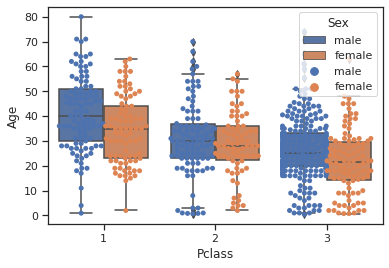

In [103]:
ax = sns.boxplot(x="Pclass", y="Age", data=datos ,hue="Sex");
ax = sns.swarmplot(x="Pclass", y="Age", data=datos, edgecolor="gray",hue="Sex" ,split=True);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


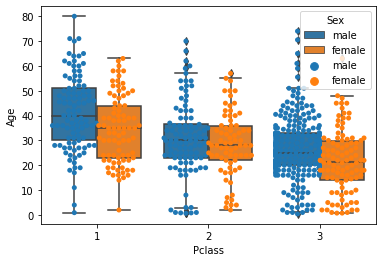

In [94]:
ax = sns.boxplot(x="Pclass", y="Age", data=datos ,hue="Sex");
ax = sns.swarmplot(x="Pclass", y="Age", data=datos, edgecolor="gray",hue="Sex" ,dodge=True);

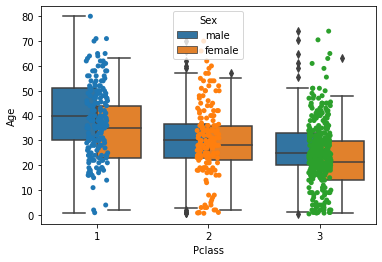

In [95]:
ax = sns.boxplot(x="Pclass", y="Age", data=datos ,hue="Sex")
ax = sns.stripplot(x="Pclass", y="Age", data=datos, jitter=True, edgecolor="gray")

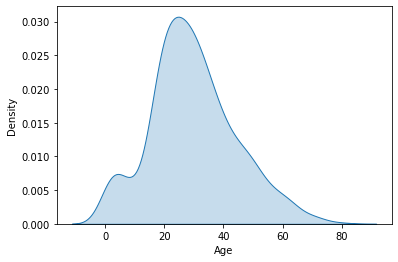

In [96]:
sns.kdeplot(data=datos["Age"], shade=True)

## Gráficos para  numéricos

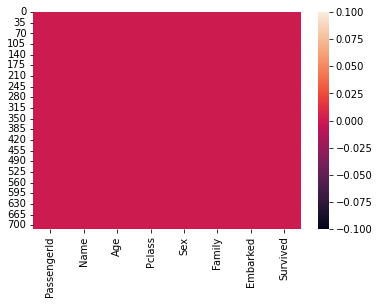

In [97]:
#ver los valores nulos en un gráfico
sns.heatmap(datos.isnull())
#la edad y cabin hay varios nulos

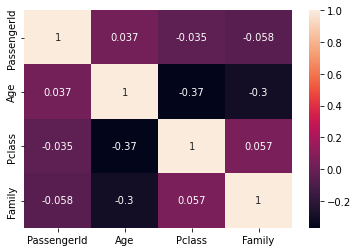

In [98]:
sns.heatmap(datos.corr(), annot=True) #mapa de correlaciones

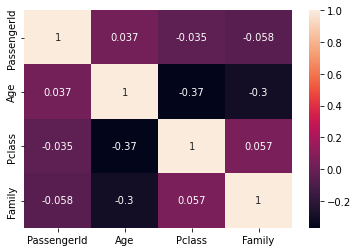

In [99]:
corr = datos.corr() 
sns.heatmap(corr, 
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values,
      annot=True) 

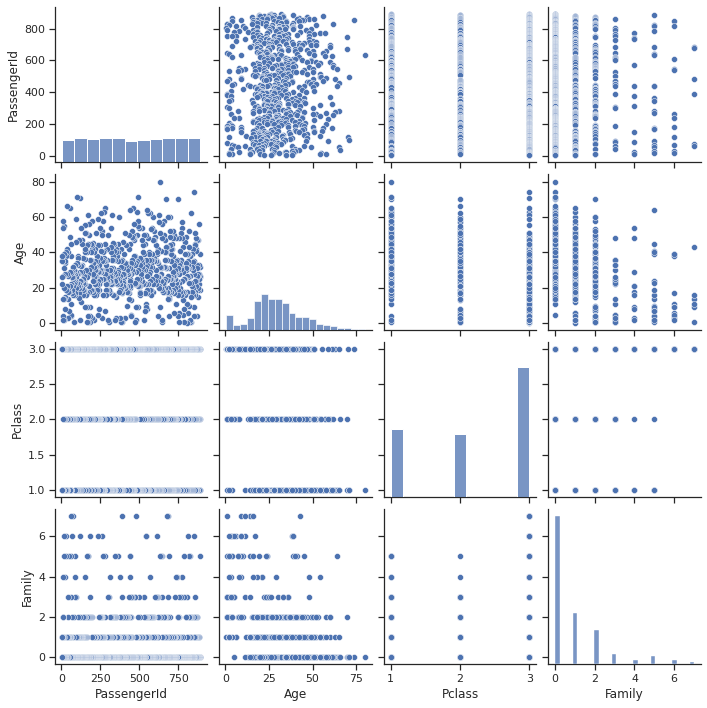

In [100]:
sns.set(style="ticks",font_scale=1)
sns.pairplot(datos)